In [1]:
from binance.client import Client
from history.retrieve import RetrieveHistory
from services.rest import BinanceRest
from services.setup import ClientSetup
from utils.constants import AppConstants
import pandas as pd

In [2]:
symbol = "XRPUSDT"
interval = Client.KLINE_INTERVAL_1MINUTE
client = ClientSetup(AppConstants.ENV_TEST).setup()
history = RetrieveHistory(symbol, interval, client)
data = history.get_historical_klines("6 hours ago UTC")
df = history.set_panda_dataFrame(data)

In [3]:
df

,Open,High,Low,Close,Volume,Number Of Trades
Open Time,,,,,,
2020-08-09 09:09:00,0.28797,0.28850,0.28797,0.28850,97316.3,101
2020-08-09 09:10:00,0.28848,0.28869,0.28843,0.28859,171224.4,122
2020-08-09 09:11:00,0.28866,0.28912,0.28859,0.28898,184917.1,148
2020-08-09 09:12:00,0.28901,0.28950,0.28896,0.28930,410522.9,147
2020-08-09 09:13:00,0.28930,0.28982,0.28925,0.28982,211855.0,170
...,...,...,...,...,...,...
2020-08-09 15:04:00,0.28695,0.28718,0.28684,0.28715,147269.0,80
2020-08-09 15:05:00,0.28716,0.28745,0.28714,0.28727,183529.3,103
2020-08-09 15:06:00,0.28726,0.28763,0.28724,0.28760,73376.4,69


In [4]:
df = history.set_bb(20,2,'Close')
df



,Open,High,Low,Close,Volume,Number Of Trades,20MAClose,20STDClose,20UpperBandClose,20LowerBandClose
Open Time,,,,,,,,,,
2020-08-09 09:09:00,0.28797,0.28850,0.28797,0.28850,97316.3,101,NaN,NaN,NaN,NaN
2020-08-09 09:10:00,0.28848,0.28869,0.28843,0.28859,171224.4,122,NaN,NaN,NaN,NaN
2020-08-09 09:11:00,0.28866,0.28912,0.28859,0.28898,184917.1,148,NaN,NaN,NaN,NaN
2020-08-09 09:12:00,0.28901,0.28950,0.28896,0.28930,410522.9,147,NaN,NaN,NaN,NaN
2020-08-09 09:13:00,0.28930,0.28982,0.28925,0.28982,211855.0,170,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-08-09 15:04:00,0.28695,0.28718,0.28684,0.28715,147269.0,80,0.286578,0.000639,0.287856,0.285300
2020-08-09 15:05:00,0.28716,0.28745,0.28714,0.28727,183529.3,103,0.286673,0.000588,0.287850,0.285497
2020-08-09 15:06:00,0.28726,0.28763,0.28724,0.28760,73376.4,69,0.286755,0.000598,0.287951,0.285560


In [8]:
# retrieve certain index
df.loc['2020-08-09 14:42:00']

Open                     0.285390
High                     0.286180
Low                      0.285360
Close                    0.286090
Volume              390015.300000
Number Of Trades       227.000000
20MAClose                0.285195
20STDClose               0.000478
20UpperBandClose         0.286152
20LowerBandClose         0.284239
Name: 2020-08-09 14:42:00, dtype: float64

<AxesSubplot:xlabel='Open Time'>

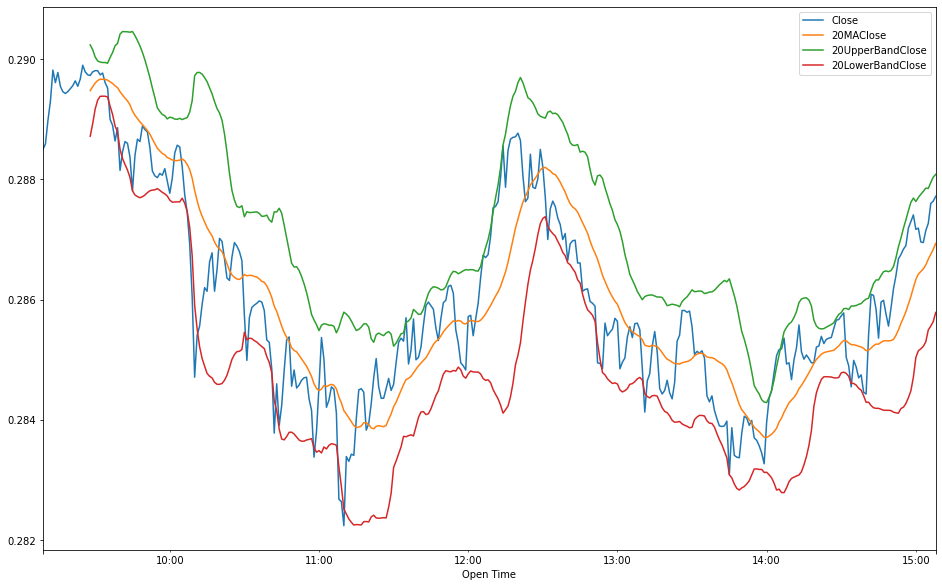

In [13]:
# plot bb
df[['Close','20MAClose','20UpperBandClose','20LowerBandClose']].plot(figsize=(16,10))